In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)

In [280]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [281]:
train_path = "/content/train.csv"
test_path = "/content/test (1).csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [282]:
df_train

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [283]:
df_train.shape

(414, 8)

In [284]:
df_test.shape

(276, 7)

> <div class="alert alert-block alert-info">
<b>💡</b> There are no missing values neither in the train nor test datasets. Also, by a quick eye-ball comparison of the summary statistics of the train and test datasets, they seem to have similar distributions.
</div>

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Description</h1>

This is a synthetic dataset generated from the [Kidney Stone Prediction based on Urine Analysis](https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis) dataset. These are the descriptions of the variables in this dataset:
<ul>
    <li> id: id of the obsevation. </li>
    <li> gravity: specific gravity, the density of the urine relative to water. </li>
    <li> ph: he negative logarithm of the hydrogen ion. </li>
    <li> osmo: osmolarity. Osmolarity is proportional to the concentration of
molecules in solution. </li>
    <li> cond: conductivity (mMho milliMho). One Mho is one
reciprocal Ohm. Conductivity is proportional to the concentration of charged
ions in solution. </li>
    <li> urea: urea concentration in millimoles per litre. </li>
    <li> calc: calcium
concentration (CALC) in millimolesllitre. </li>
    <li> target: 0- absence of stone 1- presence of stone. </li>
</ul>

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data preprocessing</h1>

In [285]:
df_train.head(3)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0


In [286]:
df_test.head(3)

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00


In [287]:
df_train.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [288]:
df_train.drop("id", inplace = True, axis = 1)
df_test.drop("id", inplace = True, axis = 1)

### The six physical characteristics found in the dataset are:
<table border="1" cellspacing="0" cellpadding="5" style="font-size: 18px;">
  <thead>
    <tr>
      <th>Characteristic</th>
      <th>Normal Range</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Specific Gravity</td>
      <td><a href = "https://www.ucsfhealth.org/medical-tests/urine-specific-gravity-test"> 1.005 - 1.030 </a></td>
    </tr>
    <tr>
      <td>pH</td>
        <td><a href = "https://www.ucsfhealth.org/medical-tests/urine-ph-test">4.6-8.0</a></td>
    </tr>
    <tr>
      <td>Osmolarity (mOsm)</td>
      <td><a href = "https://www.gloshospitals.nhs.uk/our-services/services-we-offer/pathology/tests-and-investigations/osmolality/"> 50-1200</a> </td>
    </tr>
    <tr>
      <td>Conductivity (mMho)</td>
      <td><a href = "https://pubmed.ncbi.nlm.nih.gov/19921168/"> 1.1 - 33.9</a></td>
    </tr>
    <tr>
      <td>Urea (mmol/L)</td>
      <td><a href = "https://www.news-medical.net/health/Urine-Composition-Whats-Normal.aspx">50-127.7</a></td>
    </tr>
    <tr>
      <td>Calcium (mmol/L)</td>
        <td><a href = "https://academic.oup.com/labmed/article/41/11/683/2504912">2.2-2.6</a></td>
    </tr>
  </tbody>
</table>

identifying unique row labels or removing duplicates before further analysis or processing.

In [289]:
print(set(df_train.index.tolist()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [290]:
df_train.shape

(414, 7)

In [291]:
s_temp = df_train["target"].copy()
df_train.drop("target", axis = 1, inplace = True)
df_train["train"], df_test["train"] = 1, 0
df_train["target"] = s_temp.copy()
df = pd.concat([df_train, df_test])

In [292]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   train    414 non-null    int64  
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [293]:
df_train.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
gravity,0
ph,0
osmo,0
cond,0
urea,0
calc,0
train,0
target,0


In [294]:
df_train.duplicated().any()

False

* There are **no duplicate records** present in the dataset.
* So we can say there is no **Data Lekage** in the dataset.

In [295]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gravity,690.0,1.018068,0.006631,1.005,1.01225,1.018,1.023,1.04
ph,690.0,5.949000,0.628053,4.760,5.53000,5.730,6.270,7.94
osmo,690.0,652.884058,235.186535,187.000,456.00000,668.000,840.000,1236.00
cond,690.0,21.617391,7.445628,5.100,15.80000,22.200,27.600,38.00
urea,690.0,279.588406,135.725311,10.000,170.00000,282.000,385.000,620.00
calc,690.0,4.099522,3.164418,0.170,1.46250,3.160,5.670,14.34
train,690.0,0.600000,0.490253,0.000,0.00000,1.000,1.000,1.00
target,414.0,0.444444,0.497505,0.000,0.00000,0.000,1.000,1.00


#EDA

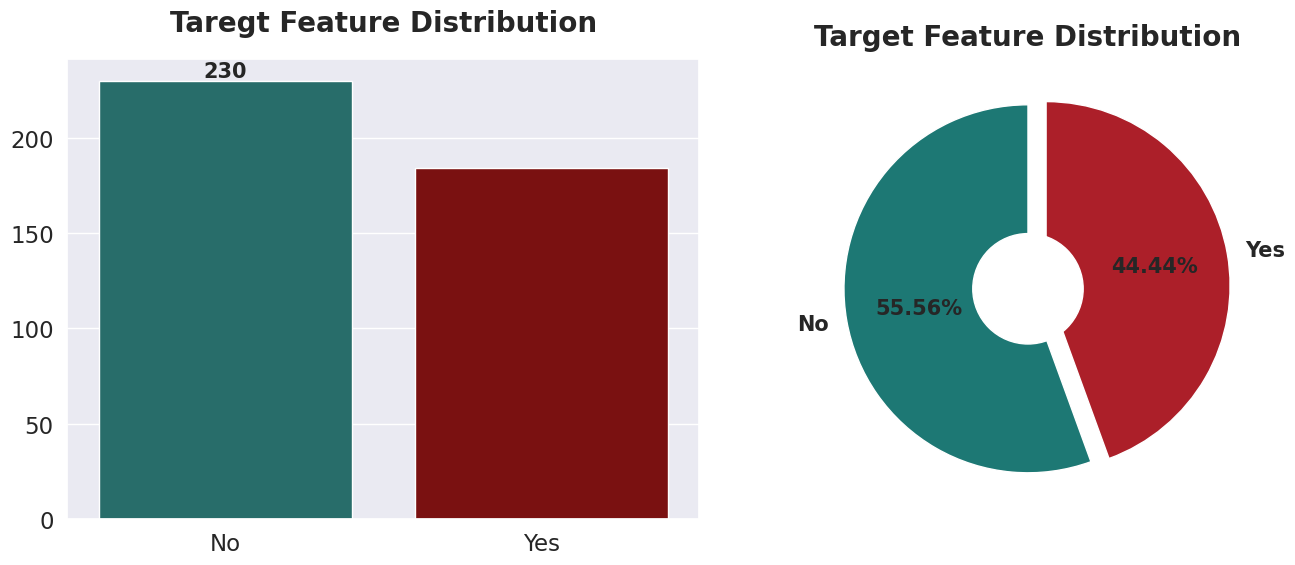

In [296]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(y=df["target"].value_counts().values,x=["No","Yes"],palette=["#1d7874","#8B0000"])
plt.title("Taregt Feature Distribution",fontweight="black",size=20,pad=20)
ax.bar_label(ax.containers[0],fontweight="black",size=15)



plt.subplot(1,2,2)
plt.pie(df["target"].value_counts().values, labels=["No","Yes"], autopct="%.2f%%",
        textprops={"fontweight":"black","size":15}, colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Target Feature Distribution",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

Unique values and their frequencies for target 0:
gravity
1.017    28
1.008    22
1.011    19
1.010    18
1.020    18
1.021    17
1.015    15
1.025     8
1.009     8
1.018     8
1.007     7
1.012     7
1.024     7
1.023     6
1.019     6
1.014     6
1.022     5
1.013     4
1.034     4
1.005     3
1.026     3
1.028     2
1.006     2
1.033     2
1.040     2
1.029     1
1.031     1
1.027     1
Name: count, dtype: int64

Unique values and their frequencies for target 1:
gravity
1.021    34
1.025    22
1.017    21
1.024    17
1.020    13
1.011     9
1.014     7
1.026     7
1.008     7
1.018     6
1.015     6
1.013     5
1.028     4
1.022     4
1.019     4
1.023     4
1.031     3
1.010     2
1.033     2
1.007     2
1.012     2
1.034     2
1.040     1
Name: count, dtype: int64


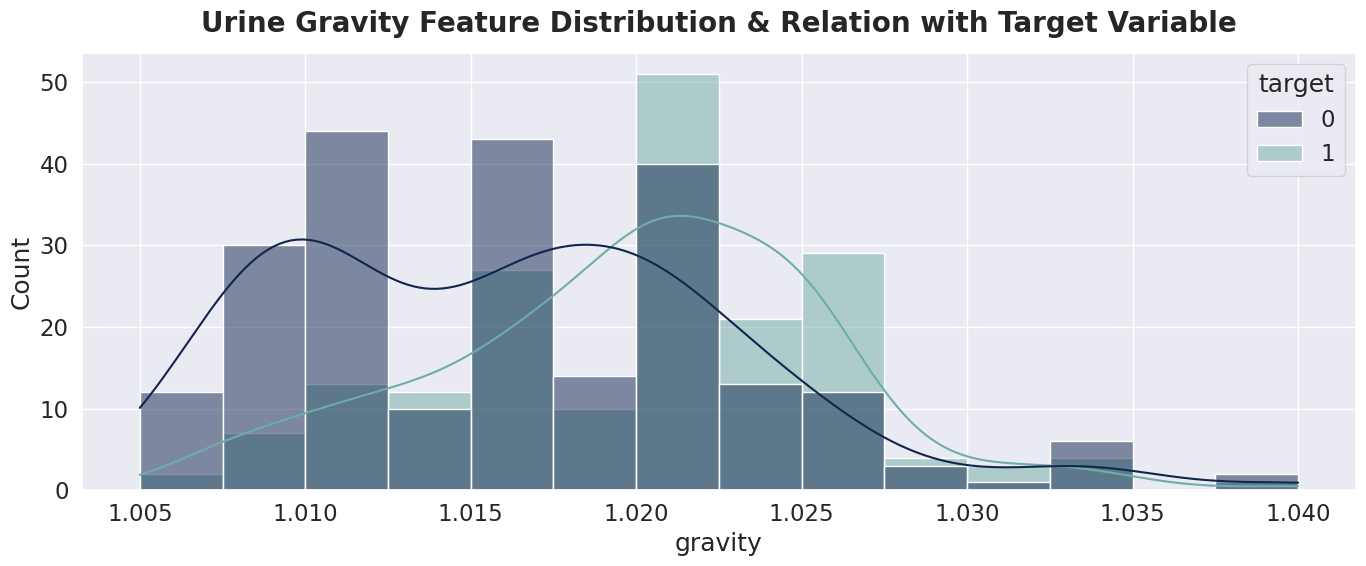

In [297]:

# Filter dataframe by target values 0 and 1
gravity_target_0 = df_train[df_train["target"] == 0]["gravity"]
gravity_target_1 = df_train[df_train["target"] == 1]["gravity"]

# Get unique values and their frequencies for each target
unique_values_target_0 = gravity_target_0.value_counts()
unique_values_target_1 = gravity_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)

# Plotting
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["gravity"], hue=df_train["target"], kde=True, palette=["#11264e", "#6faea4"])
plt.title("Urine Gravity Feature Distribution & Relation with Target Variable", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()


* **Most of patient having stone in their kidney** are having high **Urine gravity** and vice-versa.
* So we can make an infernece that **with increase in Urine gravity value** their is **more likey to have stone in their kidney.**
* Hence, this **feature is essential for model-building.**

Unique values and their frequencies for target 0:
ph
5.53    17
6.13    11
5.58     8
5.68     8
7.38     7
        ..
6.61     1
7.94     1
7.12     1
6.03     1
6.58     1
Name: count, Length: 65, dtype: int64

Unique values and their frequencies for target 1:
ph
5.53    17
5.68     8
6.79     7
5.71     6
5.62     6
6.03     6
6.19     6
5.41     5
5.58     5
6.28     5
5.66     5
5.44     5
6.76     5
6.29     5
5.24     5
5.21     4
5.94     4
5.09     4
5.16     4
5.87     4
5.98     3
6.81     3
5.77     3
5.64     3
5.51     3
5.40     3
5.56     3
7.92     2
5.60     2
5.85     2
5.27     2
5.86     2
5.36     2
6.21     2
4.91     2
5.35     2
6.27     2
5.67     2
5.47     2
6.56     2
6.13     2
6.88     2
7.30     1
6.63     1
5.63     1
5.74     1
6.90     1
6.61     1
7.20     1
5.73     1
4.81     1
7.01     1
6.37     1
6.14     1
7.61     1
5.90     1
7.90     1
7.38     1
7.12     1
Name: count, dtype: int64


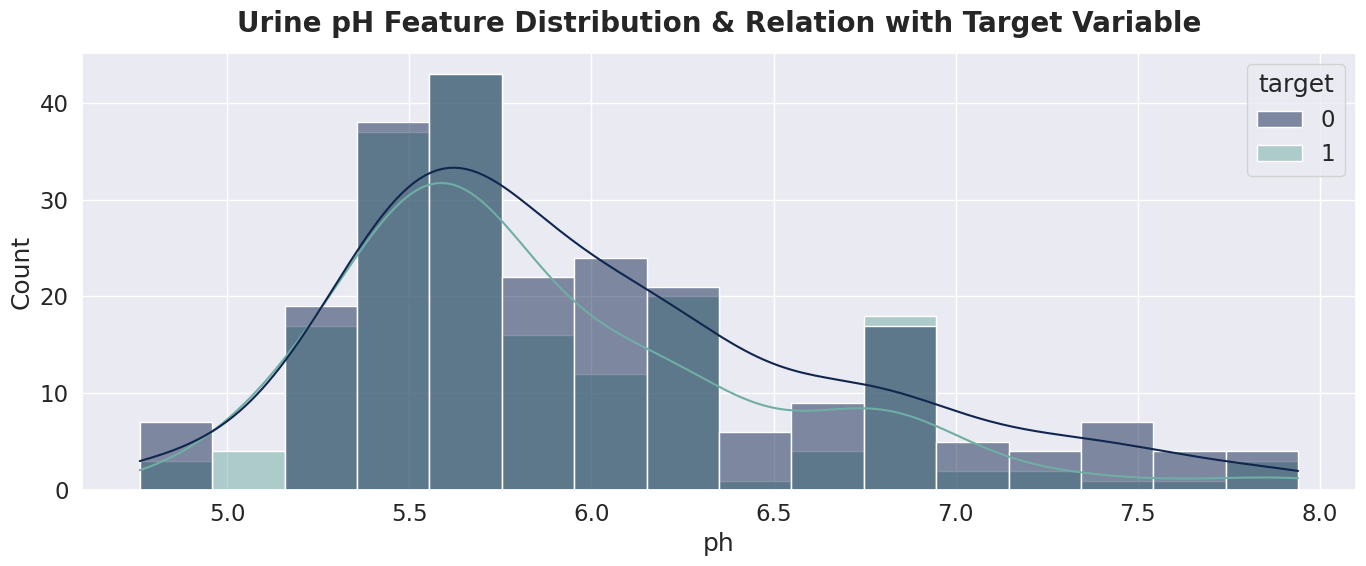

In [298]:

# Filter dataframe by target values 0 and 1
ph_target_0 = df_train[df_train["target"] == 0]["ph"]
ph_target_1 = df_train[df_train["target"] == 1]["ph"]

# Get unique values and their frequencies for each target
unique_values_target_0 = ph_target_0.value_counts()
unique_values_target_1 = ph_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)

# Plotting
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["ph"], hue=df_train["target"], kde=True, palette=["#11264e", "#6faea4"])
plt.title("Urine pH Feature Distribution & Relation with Target Variable", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()


* **Most of patient having stone in their kidney** are likely to have **pH value very low or equal to average pH value.**
* **Some of patient having high pH values** are also **suffereing from this disease.**
* So we **can't conclude any direct relation between pH and Target Variabels.**

Unique values and their frequencies for target 0:
osmo
577    17
874     9
443     7
527     7
487     7
       ..
283     1
531     1
680     1
684     1
516     1
Name: count, Length: 71, dtype: int64

Unique values and their frequencies for target 1:
osmo
874    14
442     7
876     6
577     6
907     5
       ..
736     1
567     1
242     1
760     1
325     1
Name: count, Length: 66, dtype: int64


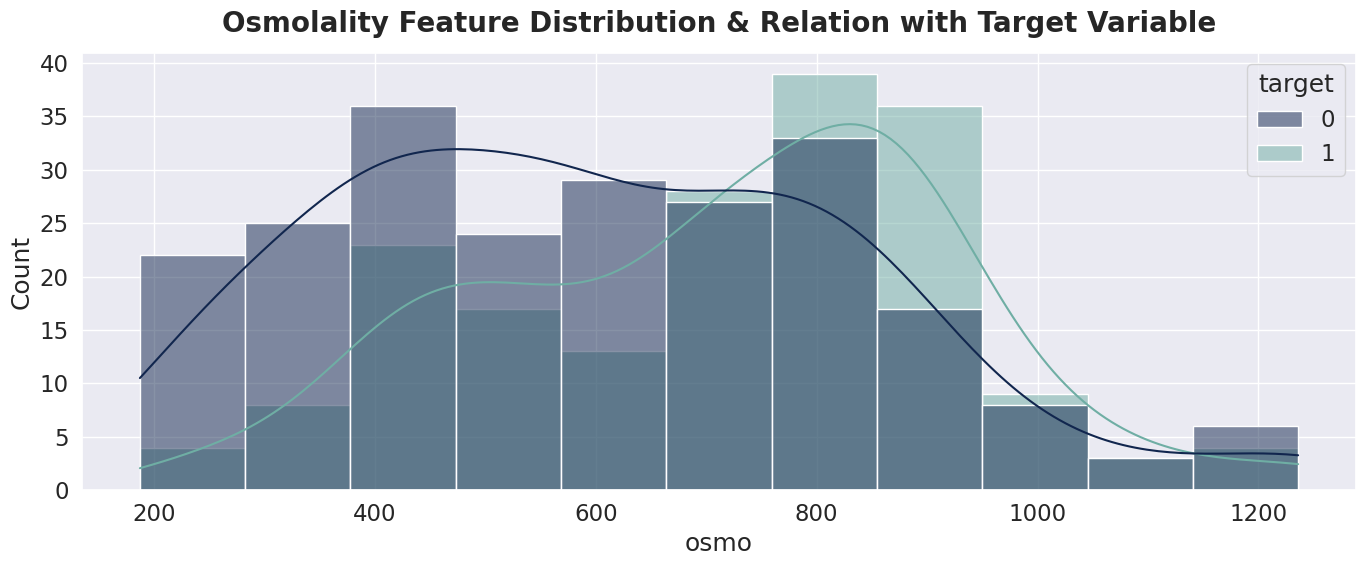

In [299]:


# Filter dataframe by target values 0 and 1
osmo_target_0 = df_train[df_train["target"] == 0]["osmo"]
osmo_target_1 = df_train[df_train["target"] == 1]["osmo"]

# Get unique values and their frequencies for each target
unique_values_target_0 = osmo_target_0.value_counts()
unique_values_target_1 = osmo_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)

# Plotting
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["osmo"], hue=df_train["target"], kde=True, palette=["#11264e", "#6faea4"])
plt.title("Osmolality Feature Distribution & Relation with Target Variable", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()


* **Most of patient having stone in their kidney** are likely to have **Osmolality value very low or very high.**
* **Patients having average osmolality value** are having **low chance of having stone in their kidney.**
* Hence, this **feature is essential for model-building.**

Unique values and their frequencies for target 0:
cond
23.6    16
29.0    15
11.2    12
25.3    10
8.8      9
25.7     9
21.4     9
27.6     7
8.1      7
20.0     7
24.5     6
33.8     6
9.9      6
20.9     5
5.1      5
26.0     5
17.7     5
38.0     4
8.4      4
10.9     4
11.3     4
12.2     4
14.0     4
15.5     3
13.3     3
12.8     3
27.9     3
17.9     3
30.1     3
25.8     3
17.4     3
19.7     3
9.8      2
13.4     2
14.9     2
23.3     2
14.6     2
15.8     2
14.8     2
33.6     2
35.8     2
26.1     2
29.5     2
35.9     2
22.2     2
32.6     2
31.2     1
20.8     1
12.4     1
28.4     1
17.6     1
17.8     1
12.6     1
27.3     1
20.6     1
21.9     1
11.5     1
27.0     1
Name: count, dtype: int64

Unique values and their frequencies for target 1:
cond
29.0    28
27.6    12
23.6    12
21.4    10
20.8     8
17.8     8
25.7     7
17.4     6
27.9     5
25.3     5
26.1     5
26.0     5
20.9     4
11.2     4
20.0     4
15.5     4
14.3     3
15.8     3
17.9     3
38.0     3
24.5 

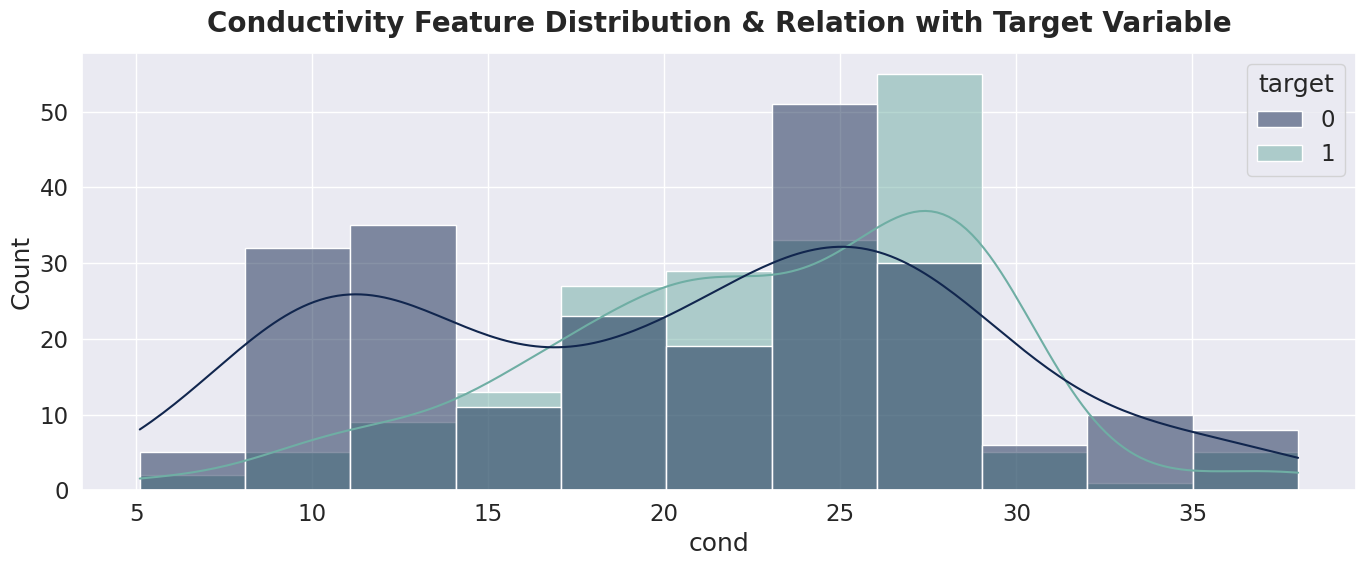

In [300]:


# Filter dataframe by target values 0 and 1
cond_target_0 = df_train[df_train["target"] == 0]["cond"]
cond_target_1 = df_train[df_train["target"] == 1]["cond"]

# Get unique values and their frequencies for each target
unique_values_target_0 = cond_target_0.value_counts()
unique_values_target_1 = cond_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)

# Plotting
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["cond"], hue=df_train["target"], kde=True, palette=["#11264e", "#6faea4"])
plt.title("Conductivity Feature Distribution & Relation with Target Variable", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()


* **Most of the patient having stone in their kidney** are having **an avergae conductivity (ion level) value.**
* But some **patient having low ion level are also suffering from this disease.**
* So we **can't conclude that there is any kind of direct relation between conductivity and target features.**

Top 10 most frequent values for target 0:
urea
87     14
159    10
195     8
170     7
214     7
199     7
239     7
395     7
75      7
124     6
Name: count, dtype: int64

Top 10 most frequent values for target 1:
urea
385    10
398     7
187     7
395     6
159     6
301     6
448     5
282     5
418     5
308     5
Name: count, dtype: int64


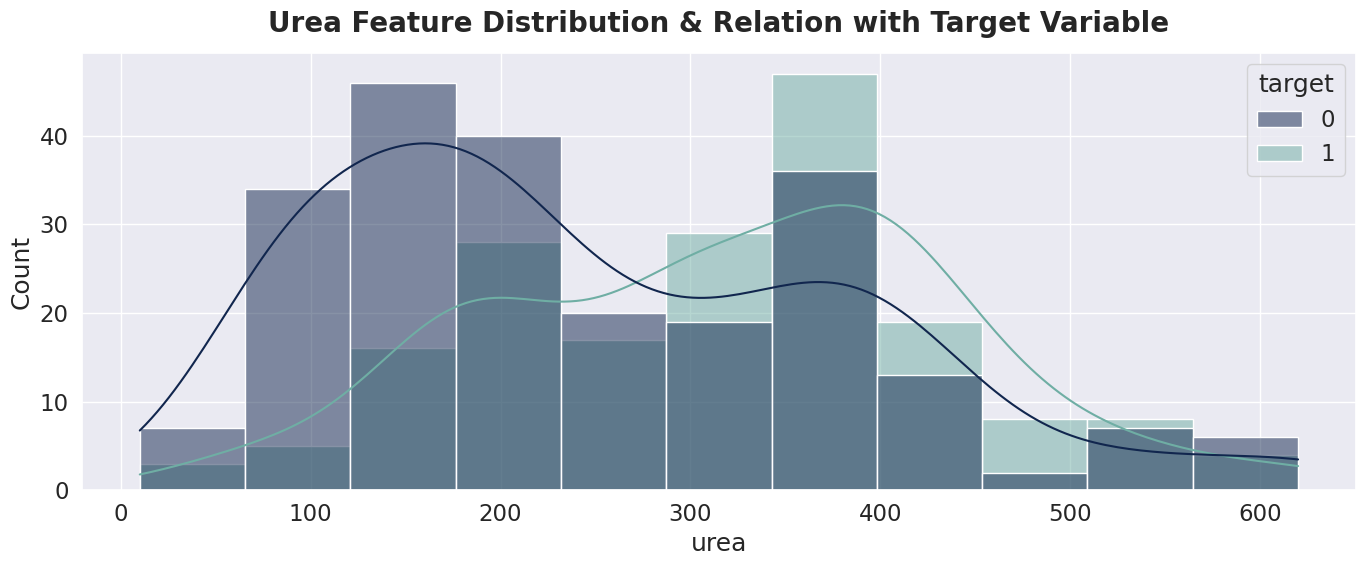

In [301]:


# Filter dataframe by target values 0 and 1
urea_target_0 = df_train[df_train["target"] == 0]["urea"]
urea_target_1 = df_train[df_train["target"] == 1]["urea"]

# Get the top 10 most frequent values for each target
top_10_values_target_0 = urea_target_0.value_counts().head(10)
top_10_values_target_1 = urea_target_1.value_counts().head(10)

# Print the top 10 most frequent values for each target
print("Top 10 most frequent values for target 0:")
print(top_10_values_target_0)
print("\nTop 10 most frequent values for target 1:")
print(top_10_values_target_1)
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["urea"],hue=df_train["target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urea Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()


In [302]:


# Filter dataframe by target values 0 and 1
urea_target_0 = df_train[df_train["target"] == 0]["urea"]
urea_target_1 = df_train[df_train["target"] == 1]["urea"]

# Get unique values and their frequencies for each target
unique_values_target_0 = urea_target_0.value_counts()
unique_values_target_1 = urea_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)


Unique values and their frequencies for target 0:
urea
87     14
159    10
195     8
170     7
214     7
       ..
354     1
302     1
317     1
282     1
212     1
Name: count, Length: 66, dtype: int64

Unique values and their frequencies for target 1:
urea
385    10
398     7
187     7
395     6
159     6
301     6
448     5
282     5
418     5
308     5
430     5
224     5
382     5
364     4
252     4
325     4
550     4
164     4
620     4
349     4
516     4
75      4
380     3
297     3
486     3
317     3
443     3
178     3
457     3
311     3
188     3
272     2
330     2
394     2
354     2
64      2
360     2
302     2
195     2
214     2
396     2
199     2
239     2
141     2
473     2
284     2
124     2
212     1
147     1
255     1
95      1
184     1
170     1
198     1
422     1
197     1
14      1
296     1
270     1
Name: count, dtype: int64


* **Most of the patient having stone in their kidney** are having **high urea values.**
* But some **patient having average or low Urea values** are also suffering from this disease.
* So we **can't conclude that there is any kind of direct relation between Urea and target features.**

Unique values and their frequencies for target 0:
calc
1.16     16
1.27     14
4.49     11
3.34      8
1.53      8
         ..
13.00     1
8.94      1
1.55      1
3.93      1
3.53      1
Name: count, Length: 67, dtype: int64

Unique values and their frequencies for target 1:
calc
4.49    12
6.96    10
9.39     9
8.94     9
6.99     9
        ..
3.01     1
2.50     1
1.45     1
2.17     1
1.03     1
Name: count, Length: 61, dtype: int64


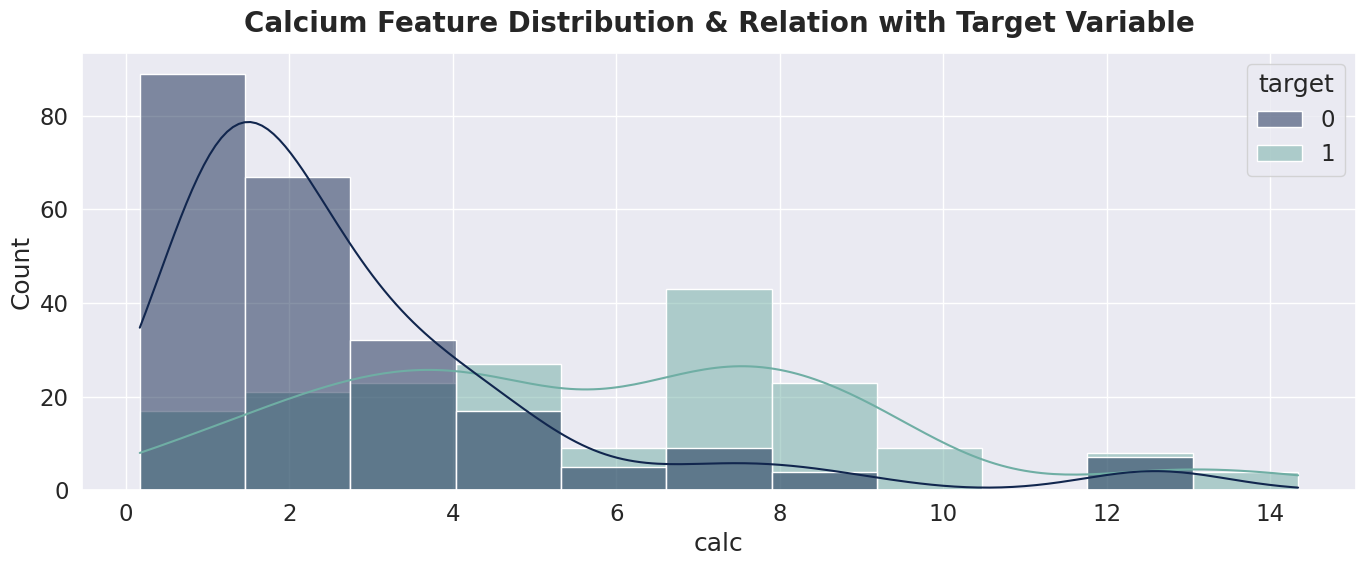

In [303]:


# Filter dataframe by target values 0 and 1
calc_target_0 = df_train[df_train["target"] == 0]["calc"]
calc_target_1 = df_train[df_train["target"] == 1]["calc"]

# Get unique values and their frequencies for each target
unique_values_target_0 = calc_target_0.value_counts()
unique_values_target_1 = calc_target_1.value_counts()

# Print unique values and their frequencies for each target
print("Unique values and their frequencies for target 0:")
print(unique_values_target_0)
print("\nUnique values and their frequencies for target 1:")
print(unique_values_target_1)

# Plotting
plt.figure(figsize=(14,6))
sns.histplot(x=df_train["calc"], hue=df_train["target"], kde=True, palette=["#11264e", "#6faea4"])
plt.title("Calcium Feature Distribution & Relation with Target Variable", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()


* **Most of the patient having stone in their kidney** are having **high calcium values.**
* so we can make an infernece that **with increase in calcium level** there is **more chance of patinet having stone in kidney.**
* Hence, this **feature is essential for model-building.**

#Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model.

In [304]:
df["gravity/ph"] = df["gravity"] / df["ph"]
df["osmo/cond"] = df["osmo"] / df["cond"]
df["gravity*ph"] = df["gravity"] * df["ph"]
df["gravity*osmo"] = df["gravity"] * df["osmo"]
df["osmo*urea"] = df["osmo"] * df["urea"]
df["cond_urea_ph"] = df["cond"] * df["urea"] / df["ph"]
df["ph*osmo"] = df["ph"] * df["osmo"]
df["cond*calc"] = df["cond"] * df["calc"]
df["gravity/calc"] = df["gravity"] / df["calc"]


In [305]:
columns = df.columns.tolist()
columns.remove("train")
columns.remove("target")

#features have varying scales  so to ensure that the magnitude of each sample's representation is consistent,we are going for normalization

In [306]:
data_norm = preprocessing.normalize(df[columns], axis=0)
df_norm = pd.DataFrame(data_norm, columns = columns)
print(df_norm)

      gravity        ph      osmo      cond      urea      calc  gravity/ph  \
0    0.037879  0.039393  0.024304  0.024645  0.015191  0.010662    0.035852   
1    0.038328  0.034365  0.038569  0.039298  0.048268  0.030736    0.041584   
2    0.037729  0.039011  0.020354  0.040797  0.019479  0.066471    0.036060   
3    0.038178  0.031247  0.024250  0.034636  0.048758  0.048751    0.045555   
4    0.038178  0.035193  0.047951  0.029640  0.047166  0.016250    0.040448   
..        ...       ...       ...       ...       ...       ...         ...   
685  0.038477  0.039902  0.046798  0.035635  0.044593  0.053751    0.035953   
686  0.037842  0.035766  0.022494  0.023313  0.023889  0.010662    0.039449   
687  0.038552  0.036147  0.047951  0.048290  0.046553  0.033015    0.039765   
688  0.038103  0.034811  0.029791  0.035635  0.020826  0.012059    0.040811   
689  0.038029  0.039393  0.038295  0.048290  0.030872  0.025956    0.035993   

     osmo/cond  gravity*ph  gravity*osmo  osmo*urea

In [307]:
df_norm.reset_index(drop = True, inplace = True)
df.reset_index(drop = True, inplace = True)

In [308]:
df_norm["train"], df_norm["target"] = df["train"], df["target"]

In [309]:
features = ['gravity/ph', 'osmo/cond', 'gravity*ph', 'gravity*osmo', 'osmo*urea',
            'cond_urea_ph', 'ph*osmo', 'cond*calc', 'gravity/calc']

In [310]:
X = df_norm[df_norm["train"] == 1][features].copy()
y = df_norm[df_norm["train"] == 1]["target"].copy()
print(X.shape, y.shape)

(414, 9) (414,)


In [311]:
df_norm

,gravity,ph,osmo,cond,urea,calc,gravity/ph,osmo/cond,gravity*ph,gravity*osmo,osmo*urea,cond_urea_ph,ph*osmo,cond*calc,gravity/calc,train,target
0,0.037879,0.039393,0.024304,0.024645,0.015191,0.010662,0.035852,0.034219,0.039212,0.024113,0.007977,0.008174,0.025670,0.006233,0.032595,1,0.0
1,0.038328,0.034365,0.038569,0.039298,0.048268,0.030736,0.041584,0.034054,0.034613,0.038719,0.040224,0.047475,0.035537,0.028652,0.011441,1,0.0
2,0.037729,0.039011,0.020354,0.040797,0.019479,0.066471,0.036060,0.017311,0.038679,0.020114,0.008567,0.017521,0.021290,0.064328,0.005208,1,0.0
3,0.038178,0.031247,0.024250,0.034636,0.048758,0.048751,0.045555,0.024293,0.031349,0.024249,0.025547,0.046485,0.020316,0.040054,0.007185,1,1.0
4,0.038178,0.035193,0.047951,0.029640,0.047166,0.016250,0.040448,0.056133,0.035308,0.047949,0.048866,0.034167,0.045245,0.011426,0.021555,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.038477,0.039902,0.046798,0.035635,0.044593,0.053751,0.035953,0.045568,0.040346,0.047164,0.045091,0.034253,0.050067,0.045436,0.006568,0,NaN
686,0.037842,0.035766,0.022494,0.023313,0.023889,0.010662,0.039449,0.033480,0.035566,0.022295,0.011611,0.013393,0.021570,0.005896,0.032563,0,NaN
687,0.038552,0.036147,0.047951,0.048290,0.046553,0.033015,0.039765,0.034454,0.036621,0.048419,0.048232,0.053491,0.046473,0.037819,0.010713,0,NaN
688,0.038103,0.034811,0.029791,0.035635,0.020826,0.012059,0.040811,0.029008,0.034856,0.029732,0.013406,0.018337,0.027805,0.010193,0.028989,0,NaN


In [312]:
alldt = df_norm.copy()  #this is now new dataframe
alldt2 = alldt.copy() #any modifications made to alldt do not affect the original DataFrame df_norm
alldt = alldt.iloc[:, :-1] #removes the target value
alldt

,gravity,ph,osmo,cond,urea,calc,gravity/ph,osmo/cond,gravity*ph,gravity*osmo,osmo*urea,cond_urea_ph,ph*osmo,cond*calc,gravity/calc,train
0,0.037879,0.039393,0.024304,0.024645,0.015191,0.010662,0.035852,0.034219,0.039212,0.024113,0.007977,0.008174,0.025670,0.006233,0.032595,1
1,0.038328,0.034365,0.038569,0.039298,0.048268,0.030736,0.041584,0.034054,0.034613,0.038719,0.040224,0.047475,0.035537,0.028652,0.011441,1
2,0.037729,0.039011,0.020354,0.040797,0.019479,0.066471,0.036060,0.017311,0.038679,0.020114,0.008567,0.017521,0.021290,0.064328,0.005208,1
3,0.038178,0.031247,0.024250,0.034636,0.048758,0.048751,0.045555,0.024293,0.031349,0.024249,0.025547,0.046485,0.020316,0.040054,0.007185,1
4,0.038178,0.035193,0.047951,0.029640,0.047166,0.016250,0.040448,0.056133,0.035308,0.047949,0.048866,0.034167,0.045245,0.011426,0.021555,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.038477,0.039902,0.046798,0.035635,0.044593,0.053751,0.035953,0.045568,0.040346,0.047164,0.045091,0.034253,0.050067,0.045436,0.006568,0
686,0.037842,0.035766,0.022494,0.023313,0.023889,0.010662,0.039449,0.033480,0.035566,0.022295,0.011611,0.013393,0.021570,0.005896,0.032563,0
687,0.038552,0.036147,0.047951,0.048290,0.046553,0.033015,0.039765,0.034454,0.036621,0.048419,0.048232,0.053491,0.046473,0.037819,0.010713,0
688,0.038103,0.034811,0.029791,0.035635,0.020826,0.012059,0.040811,0.029008,0.034856,0.029732,0.013406,0.018337,0.027805,0.010193,0.028989,0


#The ROC AUC score ranges from 0 to 1, where 0 represents a poor model (classifies all instances incorrectly) and 1 represents a perfect model (classifies all instances correctly).

calculating the ROC AUC score by comparing the true labels y_val (the ground truth) against the predicted probabilities ensemble_preds (the output of our ensemble model) for validation set.

ROC AUC Score: 0.9592198581560283


In [317]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predictions for Random Forest Classifier
rfc_preds = rfc_model.predict(X_val)
# Predictions for XGBoost Classifier
xgb_preds = xbc_model.predict(X_val)
# Classification report and confusion matrix for Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_val, rfc_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_val, rfc_preds))

# Additional evaluation metrics for Random Forest Classifier
rfc_accuracy = accuracy_score(y_val, rfc_preds)
rfc_precision = precision_score(y_val, rfc_preds)
rfc_recall = recall_score(y_val, rfc_preds)
rfc_f1 = f1_score(y_val, rfc_preds)
print("\nRandom Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {rfc_accuracy:.4f}")
print(f"Precision: {rfc_precision:.4f}")
print(f"Recall: {rfc_recall:.4f}")
print(f"F1-score: {rfc_f1:.4f}")

# Classification report and confusion matrix for XGBoost Classifier
print("\nXGBoost Classifier:")
print(classification_report(y_val, xgb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_val, xgb_preds))

# Additional evaluation metrics for XGBoost Classifier
xgb_accuracy = accuracy_score(y_val, xgb_preds)
xgb_precision = precision_score(y_val, xgb_preds)
xgb_recall = recall_score(y_val, xgb_preds)
xgb_f1 = f1_score(y_val, xgb_preds)
print("\nXGBoost Classifier Evaluation Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")

# ROC AUC score for the ensemble
ensemble_preds = (.5 * rfc_preds + .5 * xgb_preds)
ensemble_score = roc_auc_score(y_val, ensemble_preds)
print("\nEnsemble ROC AUC Score:", ensemble_score)


Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        94
         1.0       0.76      0.74      0.75        72

    accuracy                           0.78       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.78      0.78      0.78       166

Confusion Matrix:
[[77 17]
 [19 53]]

Random Forest Classifier Evaluation Metrics:
Accuracy: 0.7831
Precision: 0.7571
Recall: 0.7361
F1-score: 0.7465

XGBoost Classifier:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        94
         1.0       0.98      0.90      0.94        72

    accuracy                           0.95       166
   macro avg       0.96      0.95      0.95       166
weighted avg       0.95      0.95      0.95       166

Confusion Matrix:
[[93  1]
 [ 7 65]]

XGBoost Classifier Evaluation Metrics:
Accuracy: 0.9518
Precision: 0.9848
Recall: 0.9028
F1-score: 0.9420

Ense

In [ ]:
# X = alldt[alldt["train"] == 1].copy()
# y = alldt2[alldt2["train"] == 1]["target"].copy()
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 121)
# X_train, y_train = X, y

# xbc_model = XGBClassifier(n_estimators = 140, learning_rate = 0.05, max_depth = 4,
#                           eval_metric = "auc", booster = 'gbtree')
# xbc_model.fit(X_train, y_train)

# rfc_model = RandomForestClassifier(n_estimators = 140, max_depth = 4)
# rfc_model.fit(X_train, y_train)

# # # Initialize Gaussian Naive Bayes classifier
# # nb_model = GaussianNB()
# # # Train Gaussian Naive Bayes classifier
# # nb_model.fit(X_train, y_train)
# # # Initialize CatBoost Classifier
# # catboost_model = CatBoostClassifier(n_estimators=140, learning_rate=0.05, max_depth=4, eval_metric="AUC")
# # # Train CatBoost Classifier
# # catboost_model.fit(X_train, y_train)
# rfc_preds = rfc_model.predict_proba(X_val)[:, 1]
# xgb_preds = xbc_model.predict_proba(X_val)[:, 1]
# # nb_preds = nb_model.predict_proba(X_val)[:, 1]
# # cat_preds = catboost_model.predict_proba(X_val)[:, 1]
# ensemble_preds = (.5 * rfc_preds + .5 * xgb_preds )
# ensemble_score = roc_auc_score(y_val, ensemble_preds)
# print("ROC AUC Score:", ensemble_score)

In [315]:

# !pip install catboost
# from catboost import CatBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report, confusion_matrix

# # Get predictions for each model
# rfc_preds = rfc_model.predict(X_val)
# xgb_preds = xbc_model.predict(X_val)
# nb_preds = nb_model.predict(X_val)
# cat_preds = catboost_model.predict(X_val)

# # Print classification report and confusion matrix for Random Forest Classifier
# print("Random Forest Classifier:")
# print(classification_report(y_val, rfc_preds))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, rfc_preds))
# print()

# # Print classification report and confusion matrix for XGBoost Classifier
# print("XGBoost Classifier:")
# print(classification_report(y_val, xgb_preds))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, xgb_preds))
# print()

# # Print classification report and confusion matrix for Gaussian Naive Bayes Classifier
# print("Gaussian Naive Bayes Classifier:")
# print(classification_report(y_val, nb_preds))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, nb_preds))
# print()

# # Print classification report and confusion matrix for CatBoost Classifier
# print("CatBoost Classifier:")
# print(classification_report(y_val, cat_preds))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, cat_preds))
# print()